In [3]:
import seaborn as sns
df = sns.load_dataset('mpg')
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [4]:

print("--- First 5 Rows ---")
print(df.head())

print("\n--- Data Info ---")
df.info()

--- First 5 Rows ---
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   c

In [5]:
median_horsepower = df['horsepower'].median()
df['horsepower'].fillna(median_horsepower, inplace=True)
print("\n--- Missing Values After Cleaning ---")
print(df.isna().sum())


--- Missing Values After Cleaning ---
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


C:\Users\tejas\AppData\Local\Temp\ipykernel_23604\3071753244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(median_horsepower, inplace=True)


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = df.drop('name', axis=1, errors='ignore')
origin_dummies = pd.get_dummies(df['origin'], drop_first=True)
df = pd.concat([df, origin_dummies], axis=1)
df = df.drop('origin', axis=1)
print("\n--- DataFrame After One-Hot Encoding ---")
print(df.head())


--- DataFrame After One-Hot Encoding ---
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  japan   usa  
0          70  False  True  
1          70  False  True  
2          70  False  True  
3          70  False  True  
4          70  False  True  


In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('mpg', axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 318 samples
Testing set size: 80 samples


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("\nModel training complete!")


Model training complete!


In [11]:
from sklearn import metrics

predictions = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
r2 = metrics.r2_score(y_test, predictions)

print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


--- Model Evaluation ---
Mean Absolute Error (MAE): 2.29
Root Mean Squared Error (RMSE): 2.89
R-squared (R²): 0.84


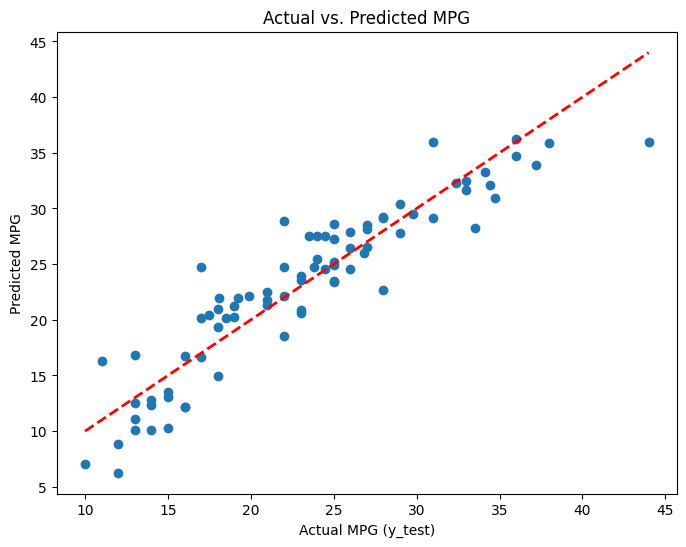

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.xlabel("Actual MPG (y_test)")
plt.ylabel("Predicted MPG")
plt.title("Actual vs. Predicted MPG")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.show()